<a href="https://colab.research.google.com/github/adesrimeilani/Pemrograman_Python/blob/main/Ade%20Sri%20Meilani.M__1101184057_TUGAS%20BESAR%20PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ade Sri Meilani. M

Nim : 1101184057

Kelas : TT-43-G2

                                        TUGAS BESAR PYTHON

                               PYTHON FOR WIRELESS COMMUNICATION MODEL









In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#Lambda
NtL = lambda x: 10*np.log10(x)
LtN = lambda x: 10**(x/10)

#PARAMETER
tipe_area = ['urban' , 'suburban' , 'open']
fr  = [700,900,1800] #Mhz
ht = 80 #meter
hr = 1.5 #meter
d = np.arange(300,1001,3.5) #300-1000
ptx = 30000 #mWatt
gtx = 10 #dB
grx = 2 #dB
BW  = 5000000 #Hz

#convert
ptx_dbm = NtL(ptx) #dbm
print(ptx_dbm)


44.771212547196626


In [52]:
#FUNGSI PATHLOSS 231
def cos(fr,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if fr in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif fr in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((fr/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(fr))+18.33*(np.log10(fr))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(fr)-0.7)*hr-(1.56*np.log10(fr)-1.8)
    Lp = Ca+(Cb*np.log10(fr))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

#FUNGSI DAYA TERIMA
def daya_terima(LP,ptx_dbm, gtx,grx):
  prx = ptx_dbm - LP + gtx + grx 
  return prx

#FUNGSI SNR
def snr_rumus(prx,BW):
  no = -174 + NtL(BW)
  no_num = LtN(no)
  SNR = prx/no_num
  return SNR

#FUNGSI CELULLAR CAPACITY
def caps(d,SNR, BW):
  one = [1]
  one_list = []
  hasil_list = []
  for i in range(len(SNR)):
    one_list = one * len(SNR)
    hasil = one_list[i] + SNR[i]
    hasil_list.append(hasil)
  kapasitas = BW*np.log2(hasil_list)
  return kapasitas

In [53]:
#FUNGSI PATHLOSS
#3 TIPE AREA PADA FREKUENSI 1800 Mhz
pl_urban = []
pl_suburban = []
pl_open = []
def pl_Urban(d,fr,tipe_area,ht,hr):
  f = fr[2]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,ht,hr,d)
    return Urban_1800
pl_urban = pl_Urban(d,fr,tipe_area,ht,hr)

def pl_Suburban(d,fr,tipe_area,ht,hr):
  f = fr[2]
  tipe = tipe_area[1]
  for i in range(len(d)):
    Suburban_1800 = cos(f,tipe,ht,hr,d)
    return Suburban_1800
pl_suburban = pl_Suburban(d,fr,tipe_area,ht,hr)
print(pl_suburban)

def pl_Open(d,fr,tipe_area,ht,hr):
  f = fr[2]
  tipe = tipe_area[2]
  for i in range(len(d)):
    Open_1800 = cos(f,tipe,ht,hr,d)
    return Open_1800
pl_open = pl_Open(d,fr,tipe_area,ht,hr)

#3 MACAM FREKUENSI PADA TIPE AREA URBAN
PL_700 = []
PL_900 = []
PL_1800 = []
def pl_700(d,fr,tipe_area,ht,hr):
  tipe = tipe_area[0]
  f = fr[0]
  for i in range(len(d)):
    u_7 = cos(f,tipe,ht,hr,d)
    return u_7
PL_700 = pl_700(d,fr,tipe_area,ht,hr)

def pl_900(d,fr,tipe_area,ht,hr):
  tipe = tipe_area[0]
  f = fr[1]
  for i in range(len(d)):
    u_9 = cos(f,tipe,ht,hr,d)
    return u_9
PL_900 = pl_900(d,fr,tipe_area,ht,hr)

def pl_1800(d,fr,tipe_area,ht,hr):
  tipe = tipe_area[0]
  f = fr[2]
  for i in range(len(d)):
    u_18 = cos(f,tipe,ht,hr,d)
    return u_18
PL_1800 = pl_1800(d,fr,tipe_area,ht,hr)

[171.78462777 171.94801596 172.10953069 172.26921444 172.42710827
 172.58325185 172.73768357 172.89044054 173.04155872 173.19107288
 173.33901672 173.48542288 173.630323   173.77374775 173.91572687
 174.05628921 174.19546276 174.33327471 174.46975144 174.60491857
 174.73880099 174.8714229  175.00280781 175.13297859 175.26195747
 175.38976608 175.51642546 175.64195609 175.76637793 175.88971038
 176.01197235 176.13318227 176.25335809 176.37251731 176.49067697
 176.60785372 176.72406376 176.83932292 176.95364664 177.06704997
 177.17954762 177.29115393 177.40188292 177.51174829 177.62076338
 177.72894127 177.83629472 177.94283619 178.04857788 178.15353171
 178.25770932 178.36112212 178.46378126 178.56569763 178.66688192
 178.76734456 178.86709577 178.96614557 179.06450373 179.16217987
 179.25918336 179.35552342 179.45120905 179.54624909 179.64065218
 179.73442681 179.8275813  179.92012378 180.01206226 180.10340455
 180.19415835 180.28433119 180.37393046 180.46296341 180.55143715
 180.63935

In [54]:
#FUNGSI DAYA TERIMA
# 3 TIPE AREA PADA FREKUENSI 1800 Mhz
dayaterima_Urban = []
dayaterima_Suburban = []
dayaterima_Open = []
def prx_Urban(pl_urban, ptx_dbm, gtx, grx):
  for i in range(len(pl_urban)):
    x = daya_terima(pl_urban,ptx_dbm,gtx,grx)
    x_num = LtN(x)
    return x_num
dayaterima_Urban = prx_Urban(pl_urban,ptx_dbm,gtx,grx)

def prx_Suburban(pl_suburban, ptx_dbm, gtx, grx):
  for i in range(len(pl_suburban)):
    y = daya_terima(pl_suburban, ptx_dbm, gtx,grx)
    y_num = LtN(y)
    return y_num
dayaterima_Suburban = prx_Suburban(pl_suburban,ptx_dbm,gtx,grx)

def prx_Open(pl_open, ptx_dbm, gtx, grx):
  for i in range(len(pl_open)):
    z = daya_terima(pl_open, ptx_dbm, gtx,grx)
    z_num = LtN(z)
    return z_num
dayaterima_Open = prx_Open(pl_open,ptx_dbm,gtx,grx)

#3 MACAM FREKUENSI PADA TIPE AREA URBAN
dayaterima_700 = []
dayaterima_900 = []
dayaterima_1800 = []
def prx_700(PL_700, ptx_dbm, gtx, grx):
  for i in range(len(PL_700)):
    x = daya_terima(PL_700, ptx_dbm, gtx,grx)
    x_num = LtN(x)
    return x_num
dayaterima_700 = prx_700(PL_700,ptx_dbm,gtx,grx)

def prx_900(PL_900, ptx_dbm, gtx, grx):
  for i in range(len(PL_900)):
    x = daya_terima(PL_900, ptx_dbm, gtx,grx)
    x_num = LtN(x)
    return x_num
dayaterima_900 = prx_900(PL_900,ptx_dbm,gtx,grx)
print(dayaterima_900)

def prx_1800(PL_1800, ptx_dbm, gtx, grx):
  for i in range(len(PL_1800)):
    x = daya_terima(PL_1800, ptx_dbm, gtx,grx)
    x_num = LtN(x)
    return x_num
dayaterima_1800 = prx_1800(PL_1800,ptx_dbm,gtx,grx)

[1.32211851e-11 1.27330243e-11 1.22681787e-11 1.18252878e-11
 1.14030843e-11 1.10003873e-11 1.06160952e-11 1.02491797e-11
 9.89868012e-12 9.56369845e-12 9.24339453e-12 8.93698181e-12
 8.64372341e-12 8.36292856e-12 8.09394921e-12 7.83617707e-12
 7.58904076e-12 7.35200325e-12 7.12455950e-12 6.90623426e-12
 6.69658002e-12 6.49517522e-12 6.30162246e-12 6.11554692e-12
 5.93659490e-12 5.76443245e-12 5.59874408e-12 5.43923162e-12
 5.28561309e-12 5.13762172e-12 4.99500500e-12 4.85752377e-12
 4.72495147e-12 4.59707333e-12 4.47368565e-12 4.35459520e-12
 4.23961857e-12 4.12858157e-12 4.02131874e-12 3.91767283e-12
 3.81749433e-12 3.72064101e-12 3.62697757e-12 3.53637517e-12
 3.44871117e-12 3.36386869e-12 3.28173637e-12 3.20220803e-12
 3.12518243e-12 3.05056295e-12 2.97825740e-12 2.90817776e-12
 2.84023998e-12 2.77436373e-12 2.71047228e-12 2.64849225e-12
 2.58835347e-12 2.52998884e-12 2.47333412e-12 2.41832784e-12
 2.36491113e-12 2.31302763e-12 2.26262331e-12 2.21364642e-12
 2.16604734e-12 2.119778

In [55]:
#FUNGSI SNR
#3 TIPE AREA BERBEDA PADA FREKUENSI 1800 Mhz
SNR_urban = []
SNR_suburban = []
SNR_open = []
def snr_Urban(BW,dayaterima_Urban):
  snrU = snr_rumus(dayaterima_Urban,BW)
  return snrU
SNR_urban = snr_Urban(BW,dayaterima_Urban)

def snr_Suburban(BW,dayaterima_Suburban):
  snrS = snr_rumus(dayaterima_Suburban,BW)
  return snrS
SNR_suburban = snr_Suburban(BW,dayaterima_Suburban)

def snr_Open(BW,dayaterima_Open):
  snrO = snr_rumus(dayaterima_Open,BW)
  return snrO
SNR_open = snr_Open(BW,dayaterima_Open)

# 3 MACAM FREKUENSI BERBEDA PADA TIPE AREA URBAN
SNR_700 = []
SNR_900 = []
SNR_1800 = []
def snr_700(BW,dayaterima_700):
  for i in range(len(dayaterima_700)):
    snr1 = snr_rumus(dayaterima_700,BW)
    return snr1
SNR_700 = snr_700(BW,dayaterima_700)

def snr_900(BW,dayaterima_900):
  for i in range(len(dayaterima_900)):
    snr2 = snr_rumus(dayaterima_900,BW)
    return snr2
SNR_900 = snr_900(BW,dayaterima_900)

def snr_1800(BW,dayaterima_1800):
  for i in range(len(dayaterima_1800)):
    snr3 = snr_rumus(dayaterima_1800,BW)
    return snr3
SNR_1800 = snr_1800(BW,dayaterima_1800)

In [56]:
#FUNGSI CELULLAR CAPACITY
#3 TIPE AREA BERBEDA PADA FREKUENSI 1800 Mhz
CC_urban =[]
CC_suburban = []
CC_open = []
def cc_urban(d,SNR_urban, BW):
  ccu = caps(d,SNR_urban, BW)
  return ccu
CC_urban = cc_urban(d,SNR_urban,BW)

def cc_suburban(d,SNR_suburban, BW):
  ccu = caps(d,SNR_suburban, BW)
  return ccu
CC_suburban = cc_suburban(d,SNR_suburban,BW)

def cc_open(d,SNR_open, BW):
  ccu = caps(d,SNR_open, BW)
  return ccu
CC_open = cc_open(d,SNR_open,BW)

#3 MACAM FREKUENSI PADA TIPE AREA URBAN
CC_700 = []
CC_900 = []
CC_1800 = []
def cc_700(d,SNR_700, BW):
  ccu = caps(d,SNR_700, BW)
  return ccu
CC_700 = cc_700(d,SNR_700,BW)

def cc_900(d,SNR_900, BW):
  ccu = caps(d,SNR_900, BW)
  return ccu
CC_900 = cc_900(d,SNR_900,BW)

def cc_1800(d,SNR_1800, BW):
  ccu = caps(d,SNR_1800, BW)
  return ccu
CC_1800 = cc_1800(d,SNR_1800,BW)

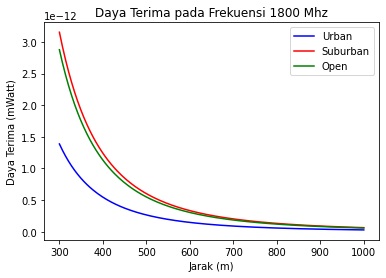

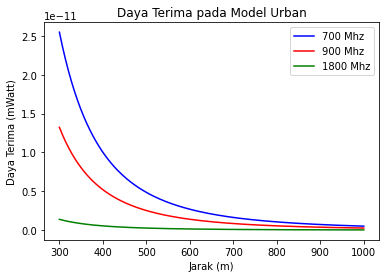

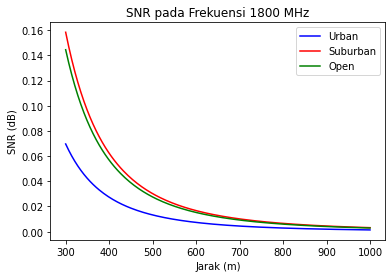

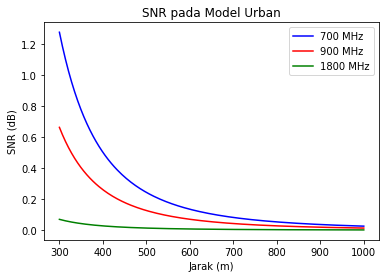

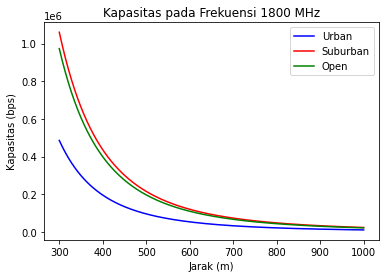

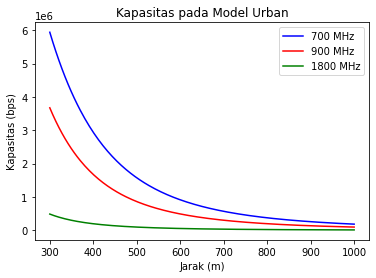

In [57]:
#GRAFIK DAYA TERIMA
def graphrx_1():
  plt.figure()
  plt.plot(d,dayaterima_Urban,'b',label='Urban')
  plt.plot(d,dayaterima_Suburban,'r',label='Suburban')
  plt.plot(d,dayaterima_Open,'g',label='Open')
  plt.legend()
  plt.title("Daya Terima pada Frekuensi 1800 Mhz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya Terima (mWatt)")
  plt.show()

def graphrx_2():
  plt.figure()
  plt.plot(d,dayaterima_700,'b',label='700 Mhz')
  plt.plot(d,dayaterima_900,'r',label='900 Mhz')
  plt.plot(d,dayaterima_1800,'g',label='1800 Mhz')
  plt.legend()
  plt.title("Daya Terima pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya Terima (mWatt)")
  plt.show()

  #GRAFIK SNR
def graph_snr1():
  plt.figure()
  plt.plot(d,SNR_urban,'b', label='Urban')
  plt.plot(d,SNR_suburban,'r', label='Suburban')
  plt.plot(d,SNR_open,'g', label='Open')
  plt.legend()
  plt.title("SNR pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()
 
def graph_snr2():
  plt.figure()
  plt.plot(d,SNR_700,'b', label='700 MHz')
  plt.plot(d,SNR_900,'r', label='900 MHz')
  plt.plot(d,SNR_1800,'g', label='1800 MHz')
  plt.legend()
  plt.title("SNR pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()

  #GRAFIK KAPASITAS
def graph_cc1():
  plt.figure()
  plt.plot(d,CC_urban,'b', label='Urban')
  plt.plot(d,CC_suburban,'r', label='Suburban')
  plt.plot(d,CC_open,'g', label='Open')
  plt.legend()
  plt.title("Kapasitas pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

def graph_cc2():
  plt.figure()
  plt.plot(d,CC_700,'b', label='700 MHz')
  plt.plot(d,CC_900,'r', label='900 MHz')
  plt.plot(d,CC_1800,'g', label='1800 MHz')
  plt.legend()
  plt.title("Kapasitas pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()


graphrx_1()
graphrx_2()
graph_snr1()
graph_snr2()
graph_cc1()
graph_cc2()

